**Import the relevent packages**

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Download and explore the dataset**

In [477]:
df = pd.read_csv("/content/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [479]:
df.isnull().any()

,0
age,False
job,False
marital,False
education,False
default,False
housing,False
loan,False
contact,False
month,False
day_of_week,False


In [480]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [481]:
df.y.value_counts()

,count
y,
no,36548
yes,4640


**Training the dataset**

there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [482]:
var_categorical = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
var_numerical = ["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","euribor3m", "nr.employed"]

print(len(var_categorical), len(var_numerical))

10 9


In [483]:
df.replace("unknown", np.nan, inplace=True)

In [484]:
(df.isnull().sum()/len(df)*100).round(2)

,0
age,0.00
job,0.80
marital,0.19
education,4.20
default,20.87
housing,2.40
loan,2.40
contact,0.00
month,0.00
day_of_week,0.00


**Number of distinct values in variable**

In [485]:
for i, column in enumerate(df.columns):
  print(f"\n{i} - {column.title()} : ")
  print(df[column].value_counts())


0 - Age : 
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

1 - Job : 
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

2 - Marital : 
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

3 - Education : 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

4 - Default : 
default
no     32588
yes        3
Name: count, dtype: int64

5 - Housing : 
housing
yes    21576
no     18622
Name: count, dtype: int64

6 - Loan : 
loan

In [486]:
def label_values(ax,spacing):
  total = 0
  for rect in ax.patches:
    total += rect.get_height()

  for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()

    space = spacing

    va = "bottom"

    if y_value < 0:
      space *= -1
      va = "top"

      label = "{:.2f}".format(y_value, y_value/total*100)

      ax.annotate(
          label,
          (x_value, y_value),
          xytext = (0, space),
          textcoords = "offset points",
          ha = "center",
          va = va
      )


**Exploratory Data Analysis**

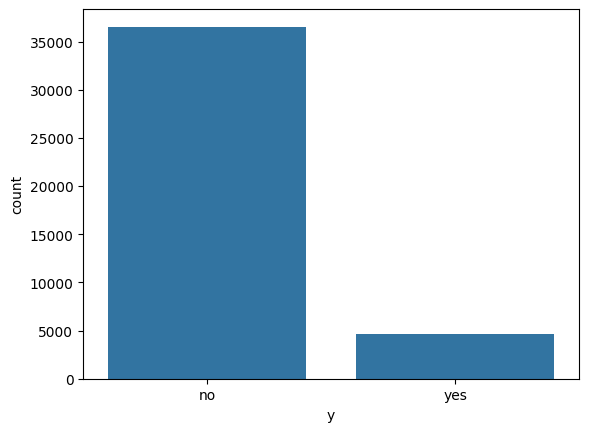

In [487]:
ax = sns.countplot(x = df["y"])
label_values(ax, spacing=1)
plt.show()


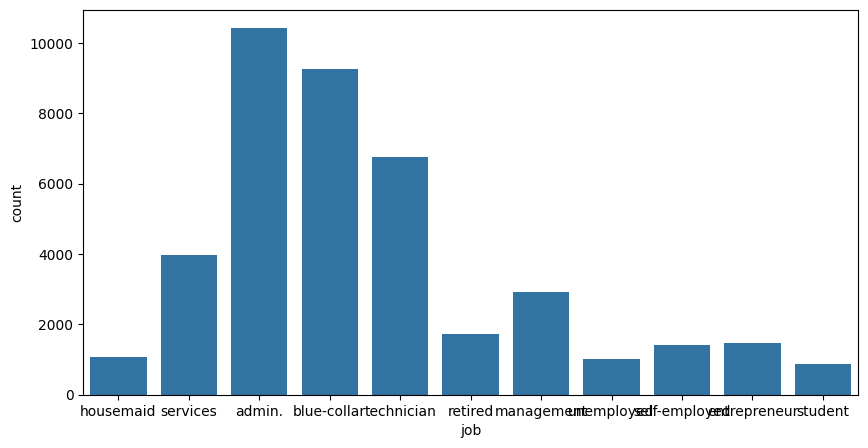

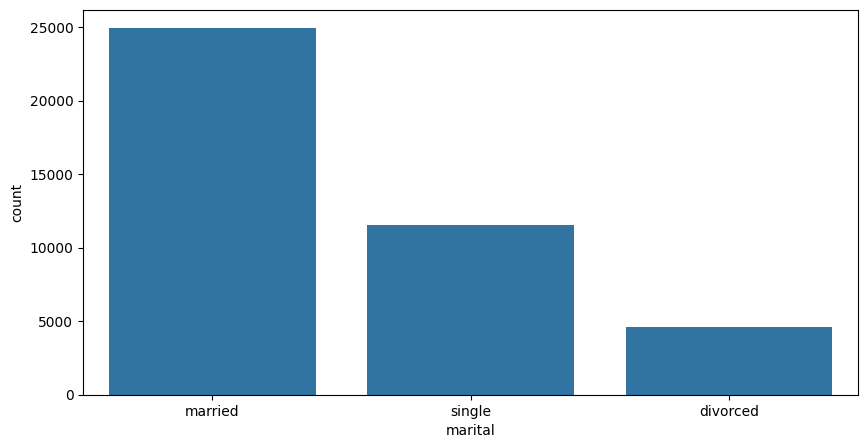

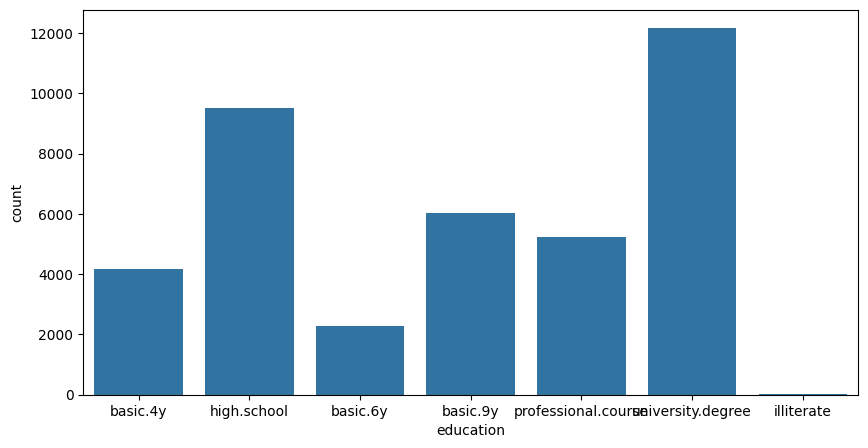

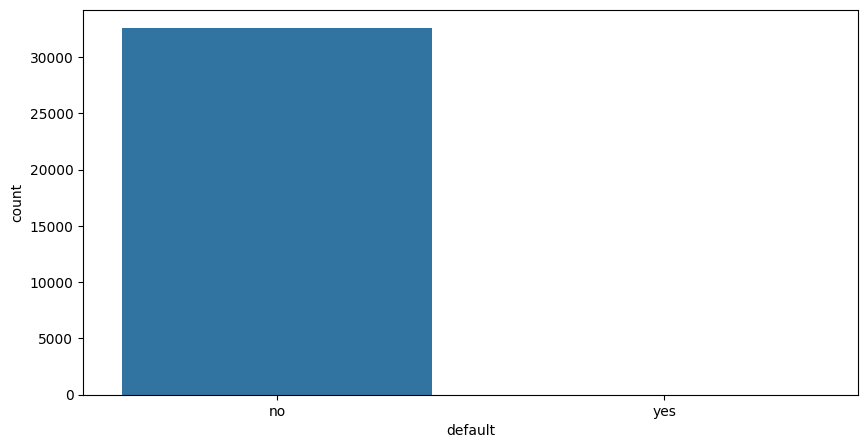

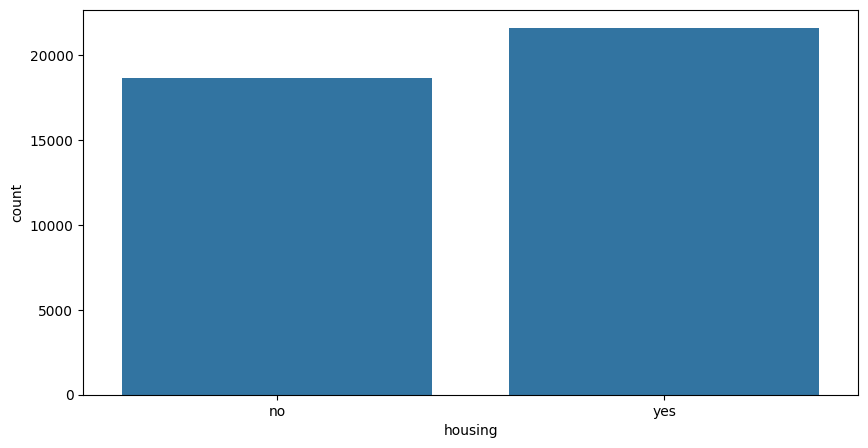

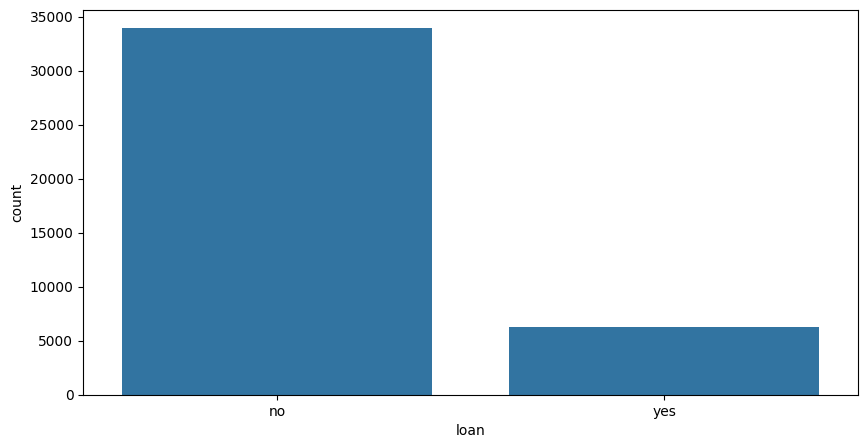

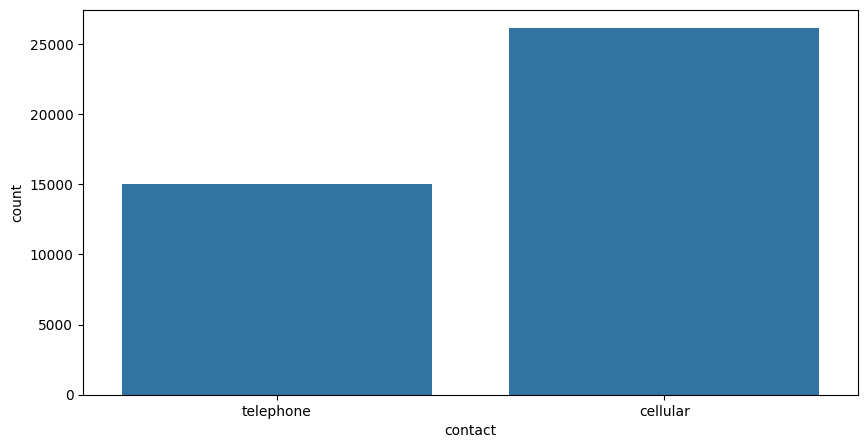

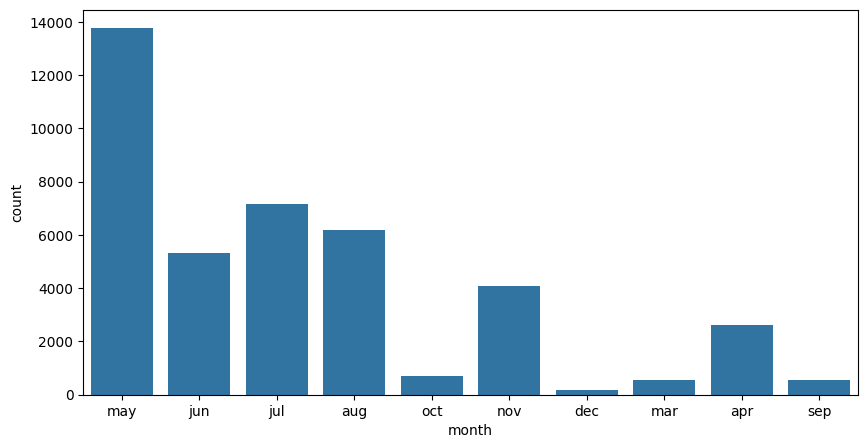

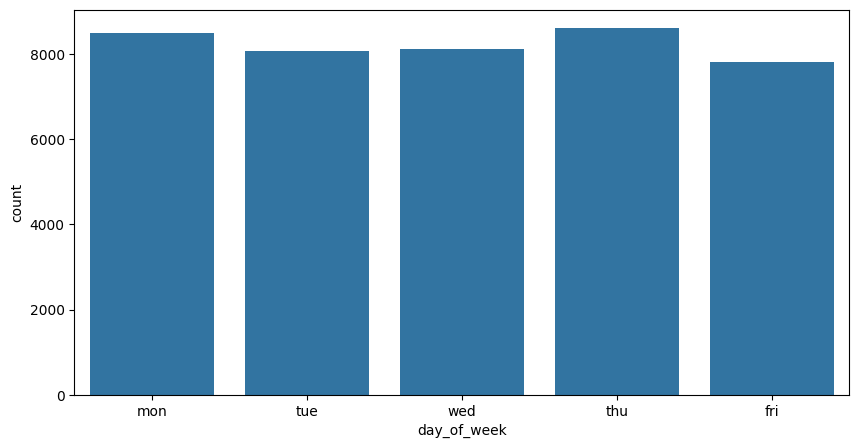

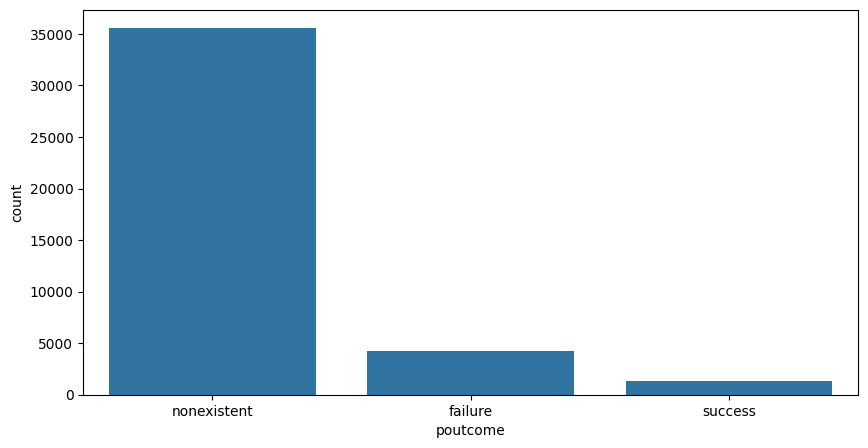

In [488]:
for column in var_categorical:
  plt.figure(figsize=(10,5))
  ax = sns.countplot(x = df[column])
  label_values(ax, spacing=1)
  plt.show()

**Insights from categorical variables (based on unvariate analysis)**



1.   **Job :** Highest Number(around 25%) of application are from admin type of job.
2.   **Default :**Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are are not taking term deposit. So we will drop this feature.

1.   **Marital: **Around 60%  of client approached were married.
2.   **Education: **Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number).

1.   
2.   List item







In [489]:
df.drop(['default'], axis = 1, inplace=True)


In [490]:
var_categorical = list(set(var_categorical) - set(['default']))

In [491]:
df.dropna(inplace=True)


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null  floa

In [493]:
duration = df['duration']
df.drop(['duration'], axis=1, inplace=True)


In [494]:
var_numerical = list(set(var_numerical) - set(['duration']))

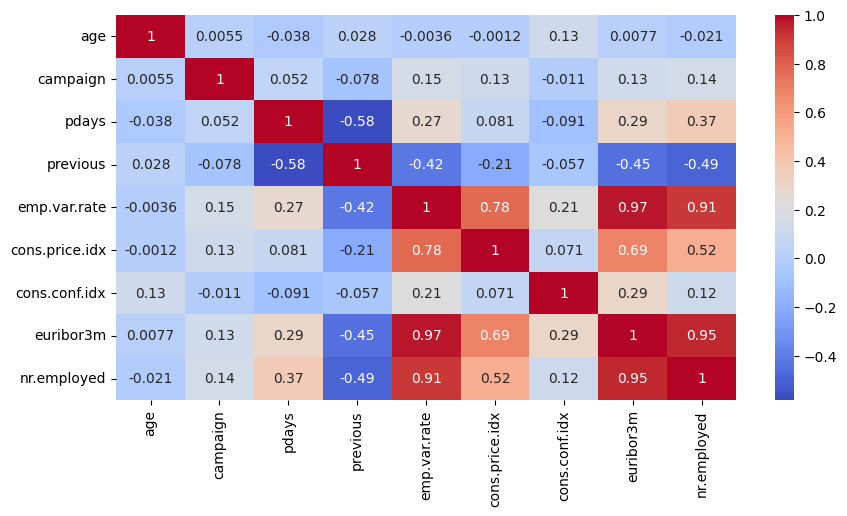

In [495]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.show()


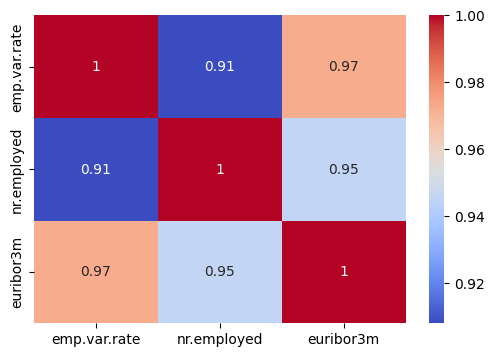

In [496]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['emp.var.rate','nr.employed','euribor3m']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [497]:
df.drop(['emp.var.rate','nr.employed','euribor3m'], axis=1, inplace=True)

In [498]:
var_numerical = list(set(var_numerical)-set(['emp.var.rate','nr.employed','euribor3m']))

Age


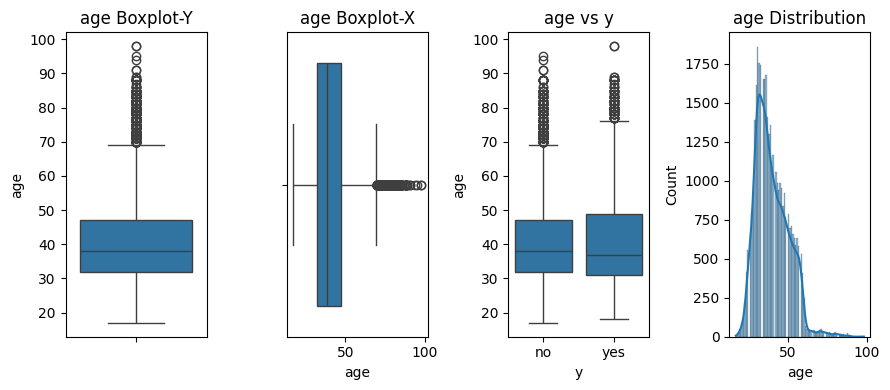

Campaign


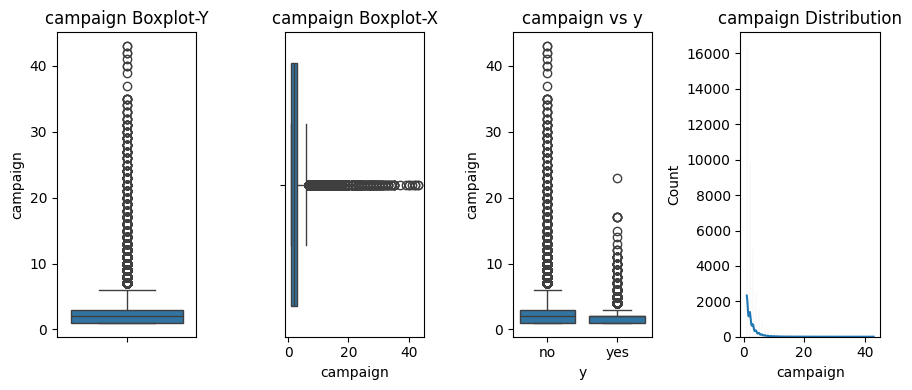

Cons.Price.Idx


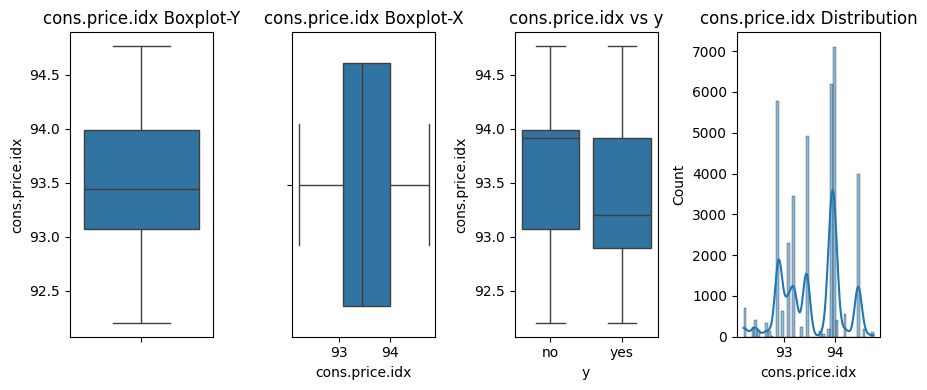

Pdays


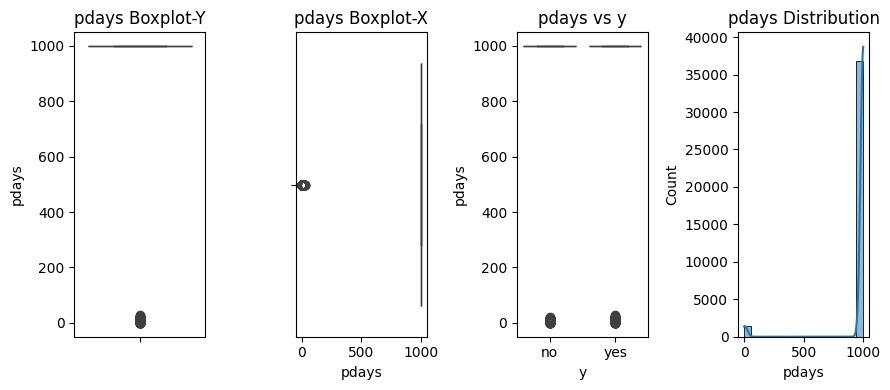

Previous


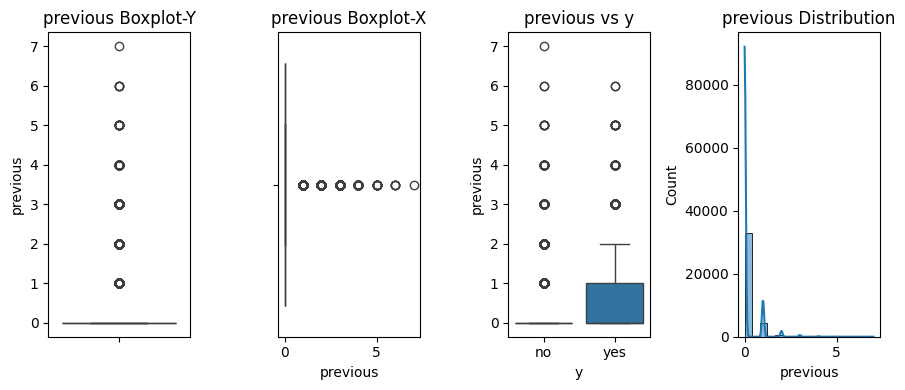

In [499]:
for column in var_numerical:
    print(column.title())

    plt.figure(figsize=(9,4))


    plt.subplot(1, 4, 1)
    sns.boxplot(y=df[column])
    plt.title(f"{column} Boxplot-Y")


    plt.subplot(1, 4, 2)
    sns.boxplot(x=df[column])
    plt.title(f"{column} Boxplot-X")


    plt.subplot(1, 4, 3)
    sns.boxplot(x=df['y'], y=df[column])
    plt.title(f"{column} vs y")

    plt.subplot(1, 4, 4)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} Distribution")

    plt.tight_layout()
    plt.show()


In [500]:
df[var_numerical].describe()

,age,campaign,cons.price.idx,pdays,previous
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,2.566662,93.570313,963.531651,0.170009
std,10.289488,2.767473,0.576367,184.295254,0.487169
min,17.000000,1.000000,92.201000,0.000000,0.000000
25%,32.000000,1.000000,93.075000,999.000000,0.000000
50%,38.000000,2.000000,93.444000,999.000000,0.000000
75%,47.000000,3.000000,93.994000,999.000000,0.000000
max,98.000000,43.000000,94.767000,999.000000,7.000000


In [501]:
print(df['campaign'].quantile(0.95), len(df[df['campaign']< df['campaign'].quantile(0.95)]))
print(df['campaign'].quantile(0.95), len(df[df['campaign']> df['campaign'].quantile(0.95)]))

7.0 36025
7.0 1636


In [502]:
df1 = df[(df['campaign'] > 23) & (df['y'] == 'yes')]
len(df1[['campaign','y']])

0

In [503]:
df1 = df[(df['campaign'] > 0) & (df['y'] == 'yes')]
print(len(df1[['campaign','y']]), len(df[df['campaign']>1]))

4258 21870


In [504]:
df['campaign'] = df['campaign'].apply(lambda x:0 if x > 0 else x)

In [505]:
print(df['age'].quantile(0.95), len(df[df['age']< df['age'].quantile(0.95)]))
print(df['age'].quantile(0.95), len(df[df['age']> df['age'].quantile(0.95)]))

58.0 36283
58.0 1435


In [506]:
print(df['previous'].quantile(0.95), len(df[df['previous']< df['previous'].quantile(0.95)]))
print(df['previous'].quantile(0.95), len(df[df['previous']>2]))

1.0 33066
1.0 273


In [507]:
for i in range(1,max(df['previous'])*1):
  print(i, end=" ")
  df1 = df[(df['previous'] >= i) & (df['y'] == 'yes')]
  print(len(df1[['previous','y']])), len(df[df['previous']>=i])

1 1336
2 466
3 160
4 43
5 13
6 2


In [508]:
df['previous'] = df['previous'].apply(lambda x:2 if x > 2 else x)

In [509]:
print(df['pdays'].quantile(0.95), len(df[df['pdays']< df['pdays'].quantile(0.95)]))
print(df['pdays'].quantile(0.95), len(df[df['pdays']> df['pdays'].quantile(0.95)]))

999.0 1366
999.0 0


In [510]:
df1 = df[(df['pdays'] >= 329) & (df['y'] == 'yes')]
print(len(df1[['pdays','y']]), len(df[df['pdays'] >= 329]))

df1 = df[(df['pdays'] < 329) & (df['y'] == 'yes')]
print(len(df1[['pdays','y']]), len(df[df['pdays'] < 329]))

df1 = df[(df['pdays'] < 28) & (df['y'] == 'yes')]
print(len(df1[['pdays','y']]), len(df[df['pdays'] < 28]))

df1 = df[(df['pdays'] > 28) & (df['y'] == 'yes')]
print(len(df1[['pdays','y']]), len(df[df['pdays'] > 28]))

df1 = df[(df['pdays'] < 30) & (df['y'] == 'yes')]
print(len(df1[['pdays','y']]), len(df[df['pdays'] < 30]))


3393 36879
865 1366
865 1366
3393 36879
865 1366


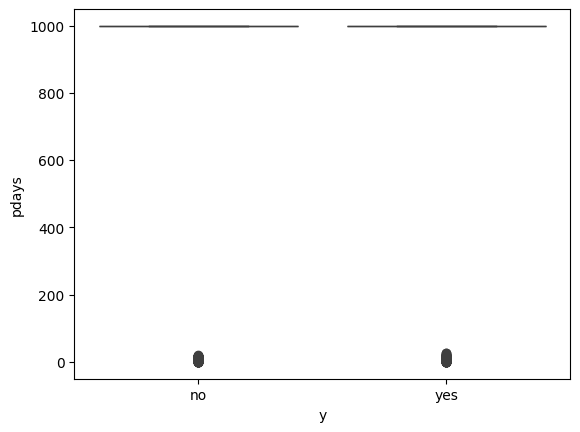

In [511]:
df1 = df[(df['pdays'] >= 329)]
sns.boxplot(x ='y',y='pdays', data=df)
plt.show()

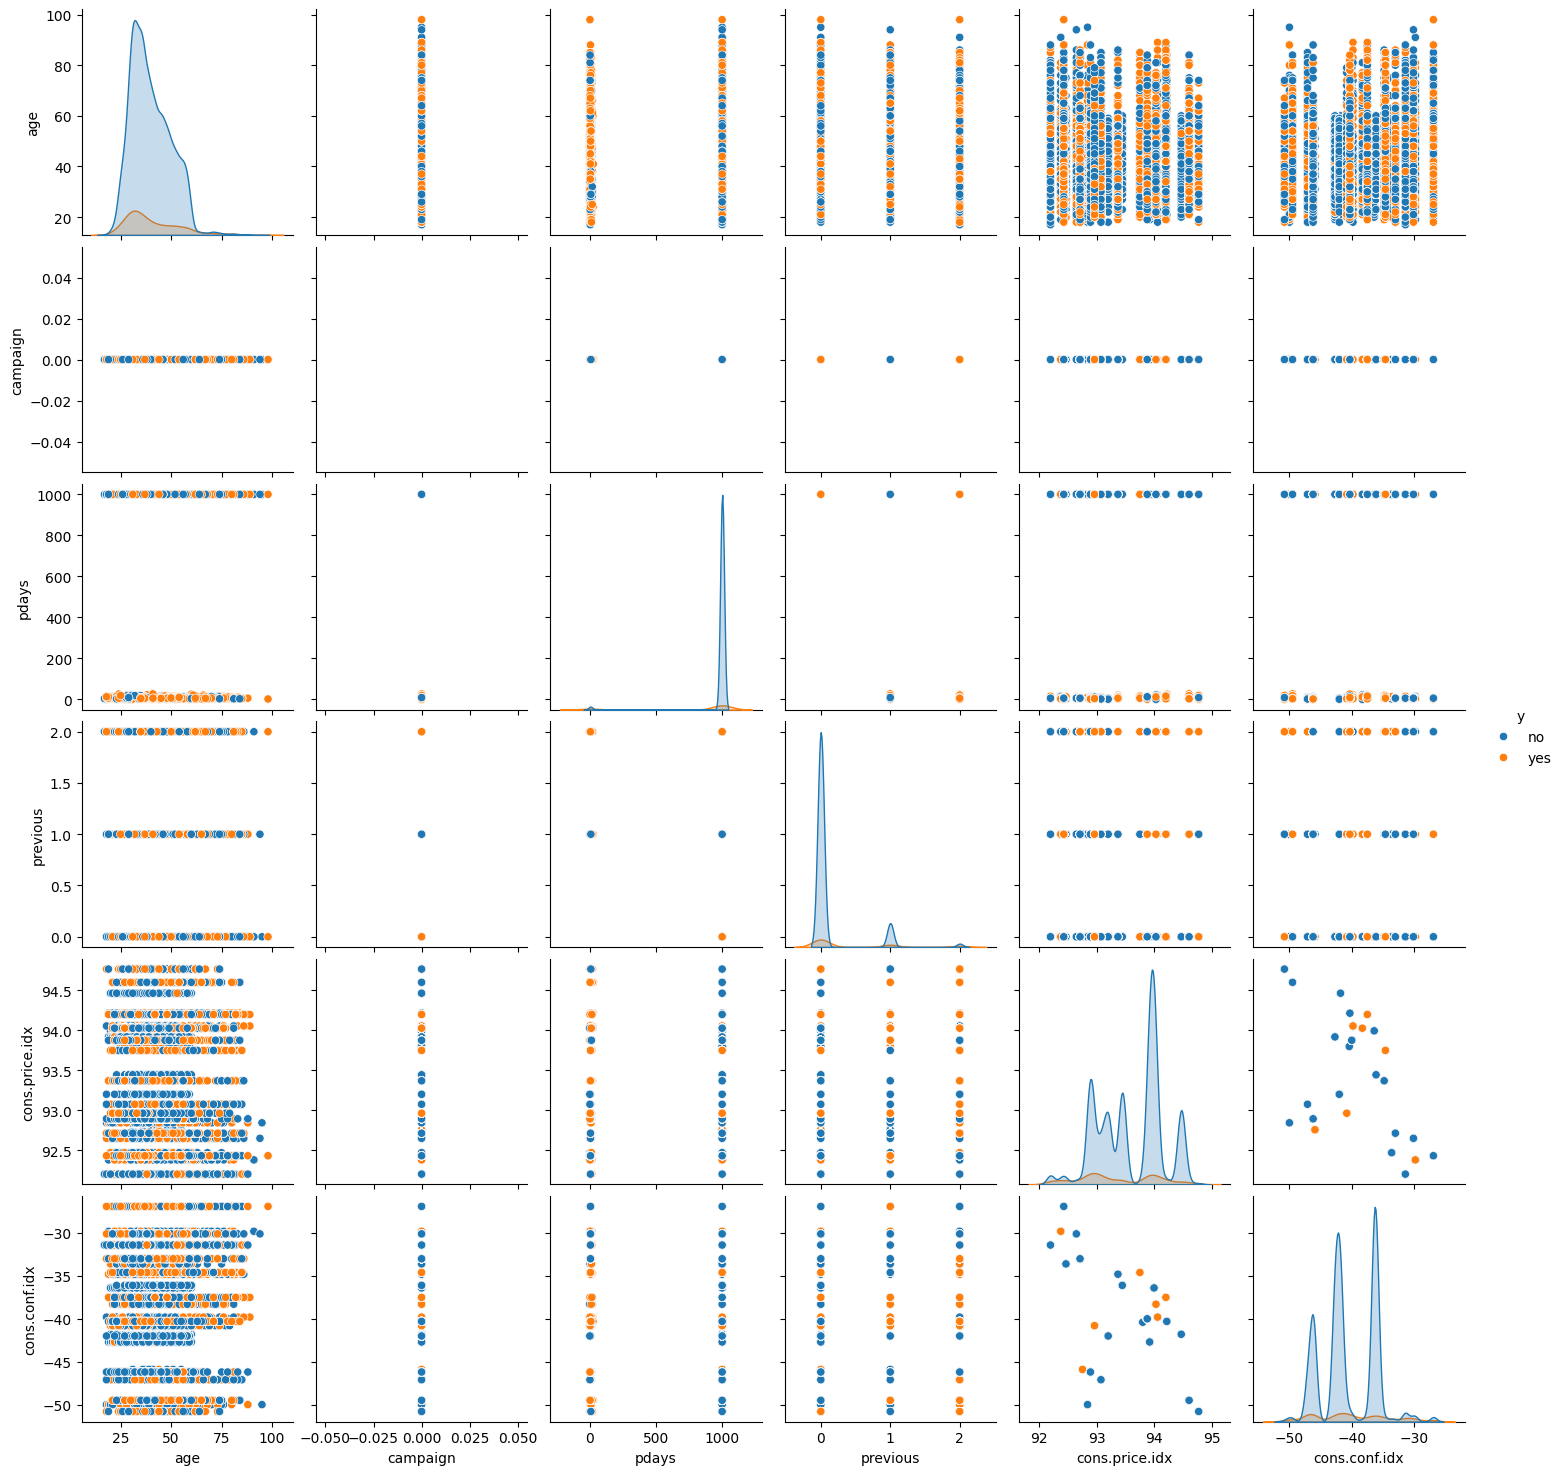

In [512]:
sns.pairplot(hue='y', data = df)
plt.show()

In [513]:
df.drop(['campaign'], axis=1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [514]:
df.isnull().sum()/len(df)*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0
pdays,0.0


Droping the missing values

In [515]:
print(len(var_categorical),var_categorical)
print(len(var_numerical),var_numerical)

9 ['contact', 'education', 'housing', 'job', 'marital', 'loan', 'poutcome', 'month', 'day_of_week']
4 ['age', 'cons.price.idx', 'pdays', 'previous']


In [516]:
print(df['loan'].value_counts())
print(df['housing'].value_counts())
print(df['contact'].value_counts())
print(df['y'].value_counts())



loan
no     32286
yes     5959
Name: count, dtype: int64
housing
yes    20578
no     17667
Name: count, dtype: int64
contact
cellular     24441
telephone    13804
Name: count, dtype: int64
y
no     33987
yes     4258
Name: count, dtype: int64


In [517]:
varlist = ['loan', 'housing', 'y']

for col in varlist:
    df[col] = df[col].map({'yes': 1, 'no': 0})


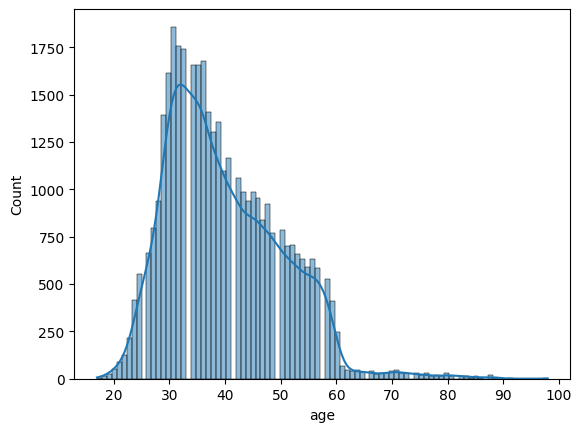

In [518]:
sns.histplot(x='age', kde=True,data=df)
plt.show()

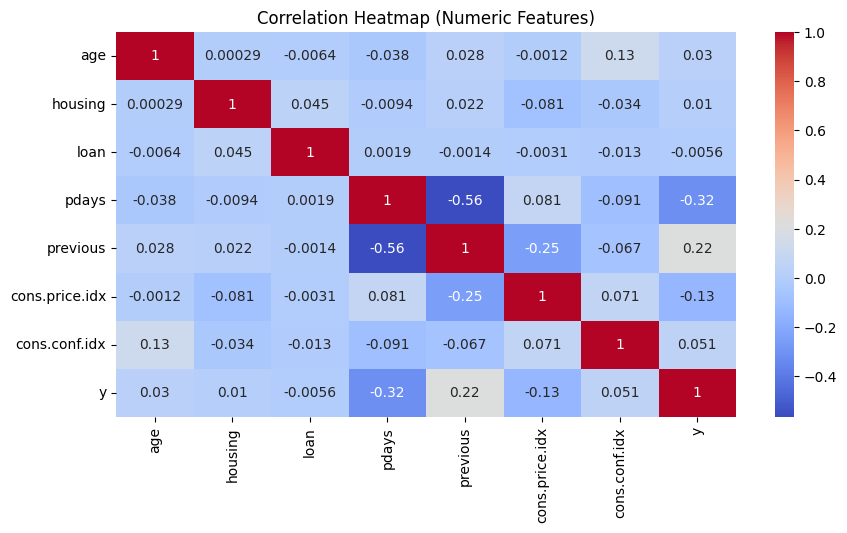

In [519]:
plt.figure(figsize=(10,5))

numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [520]:
contact = pd.get_dummies(df['contact'],drop_first=True)
poutcome = pd.get_dummies(df['poutcome'],drop_first=True)
job = pd.get_dummies(df['job'],drop_first=True)
month = pd.get_dummies(df['month'],drop_first=True)
marital = pd.get_dummies(df['marital'],drop_first=True)
day_of_week = pd.get_dummies(df['day_of_week'],drop_first=True)
education = pd.get_dummies(df['education'],drop_first=True)


In [521]:
df = pd.concat([df, contact, job, month, marital, day_of_week, education], axis=1)
df.head()


,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,999,...,True,False,False,False,False,False,False,False,False,False
1,57,services,married,high.school,0,0,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False
2,37,services,married,high.school,1,0,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,999,...,True,False,False,False,True,False,False,False,False,False
4,56,services,married,high.school,0,1,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False


In [522]:
df.drop(['contact','job','month','marital','day_of_week','education'], axis=1, inplace=True)
df.head()

,age,housing,loan,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,telephone,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,999,0,nonexistent,93.994,-36.4,0,True,...,True,False,False,False,False,False,False,False,False,False
1,57,0,0,999,0,nonexistent,93.994,-36.4,0,True,...,True,False,False,False,False,False,True,False,False,False
2,37,1,0,999,0,nonexistent,93.994,-36.4,0,True,...,True,False,False,False,False,False,True,False,False,False
3,40,0,0,999,0,nonexistent,93.994,-36.4,0,True,...,True,False,False,False,True,False,False,False,False,False
4,56,0,1,999,0,nonexistent,93.994,-36.4,0,True,...,True,False,False,False,False,False,True,False,False,False


In [523]:
df.columns

Index(['age', 'housing', 'loan', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'y', 'telephone', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'aug', 'dec', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'married', 'single', 'mon',
       'thu', 'tue', 'wed', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree'],
      dtype='object')

In [524]:
len(df.columns)

41

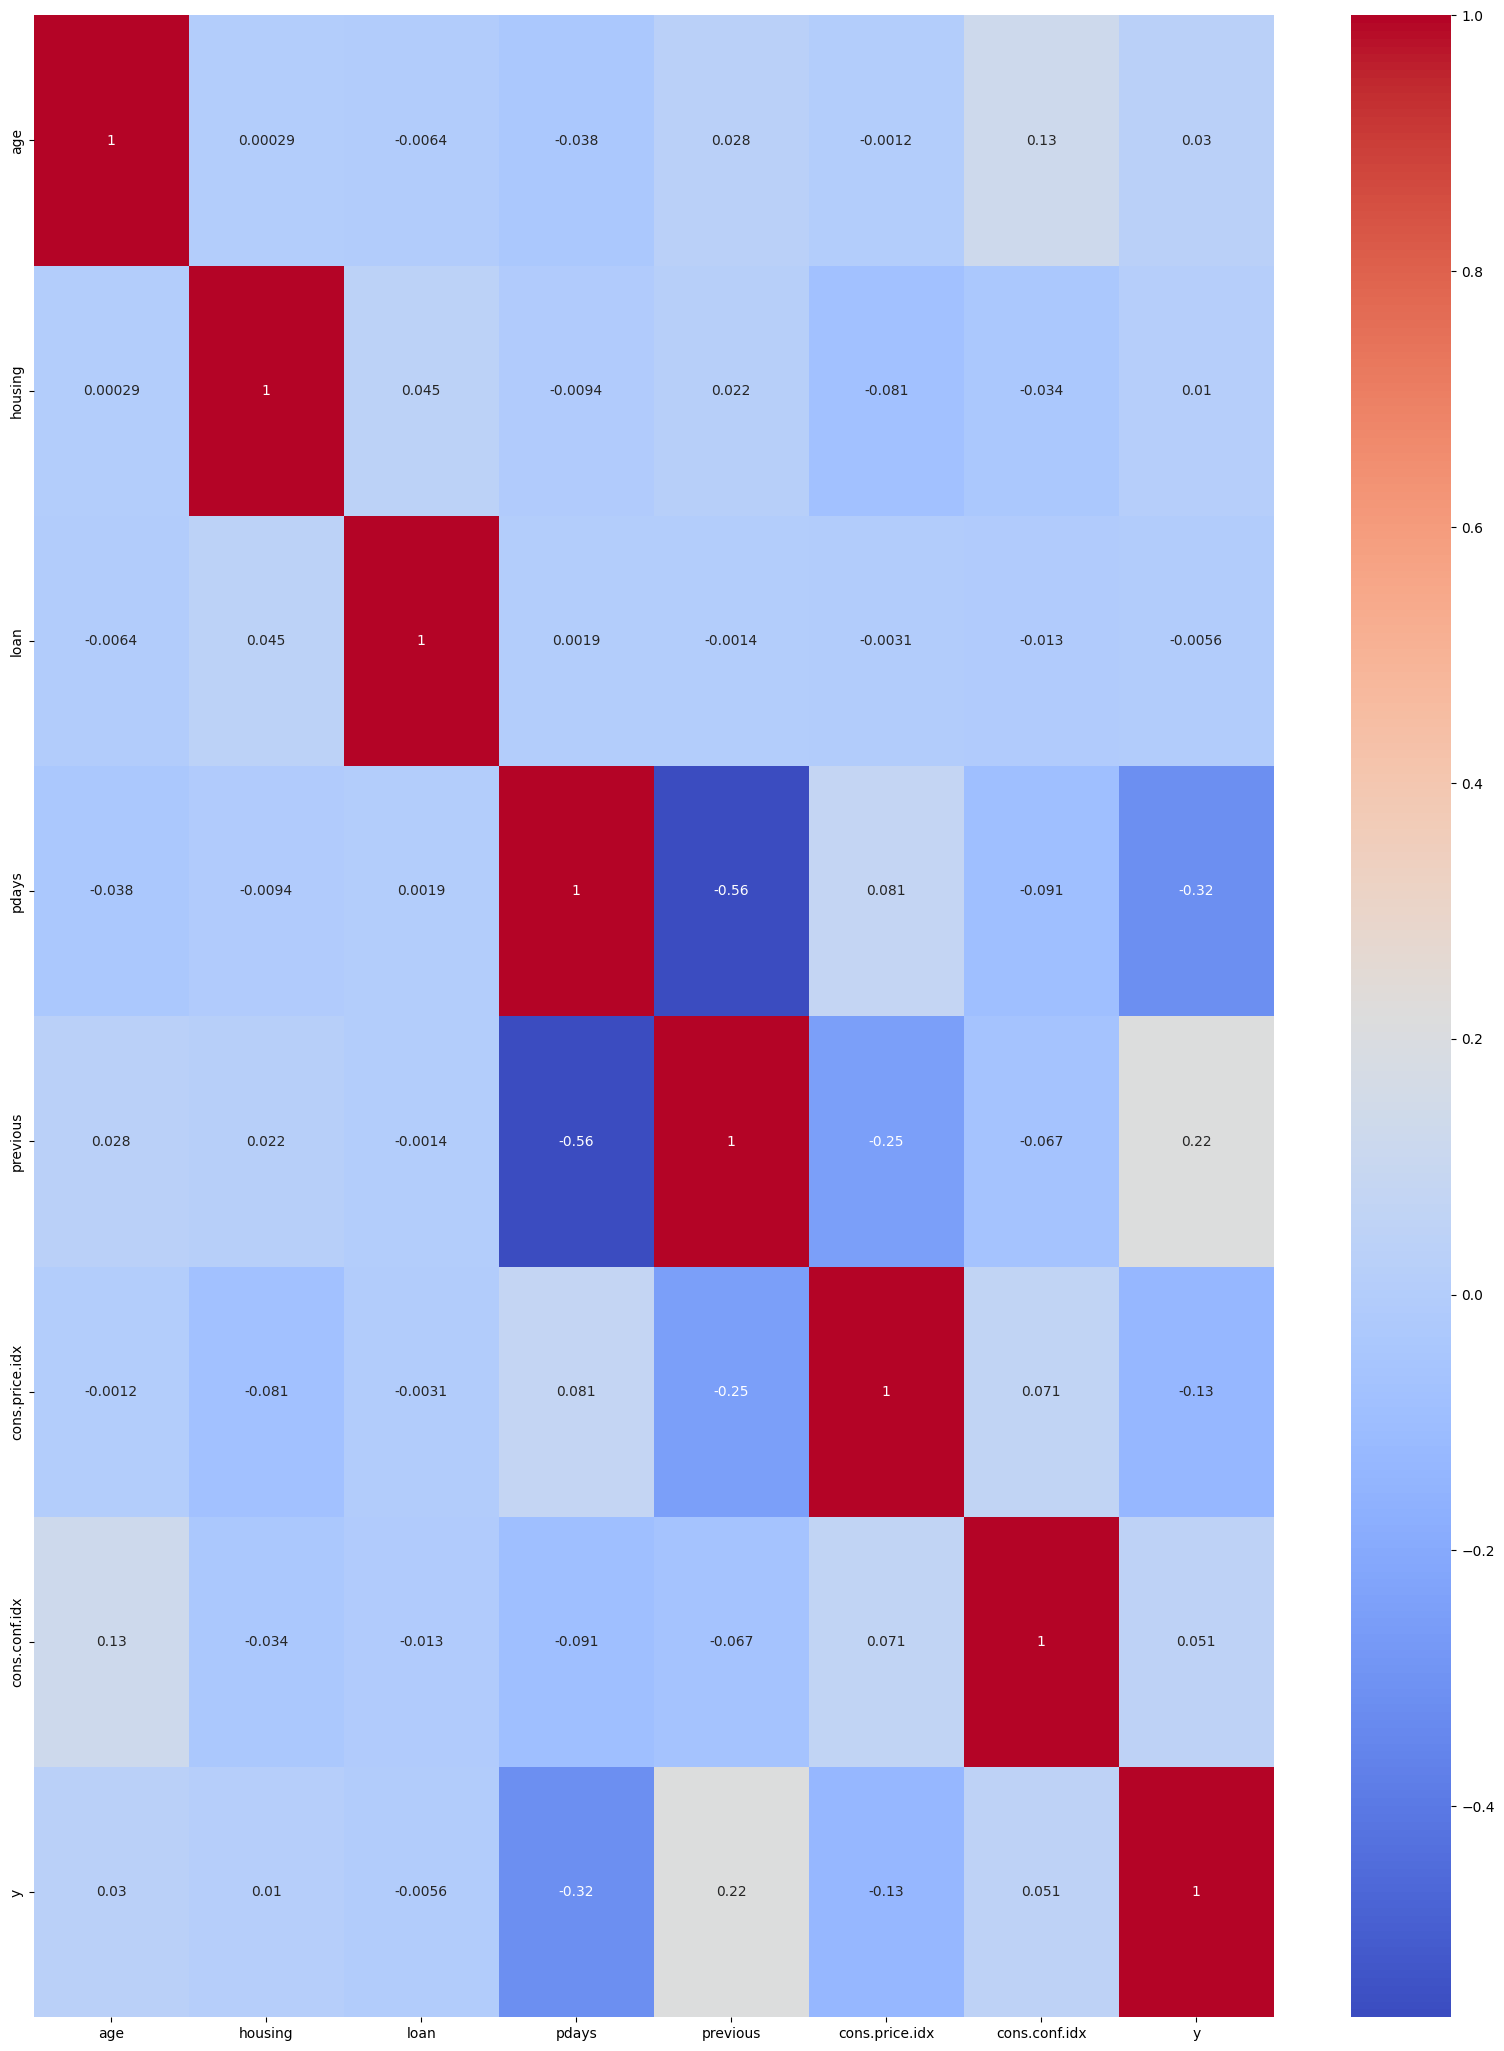

In [525]:
plt.figure(figsize=(20,26))

sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True,cmap='coolwarm')
plt.show()


**Negative Correlation**

In [526]:
df.drop(['previous','pdays'],axis=1,inplace=True)

In [527]:
var_numerical = list(set(var_numerical) - set(['previous','pdays']))

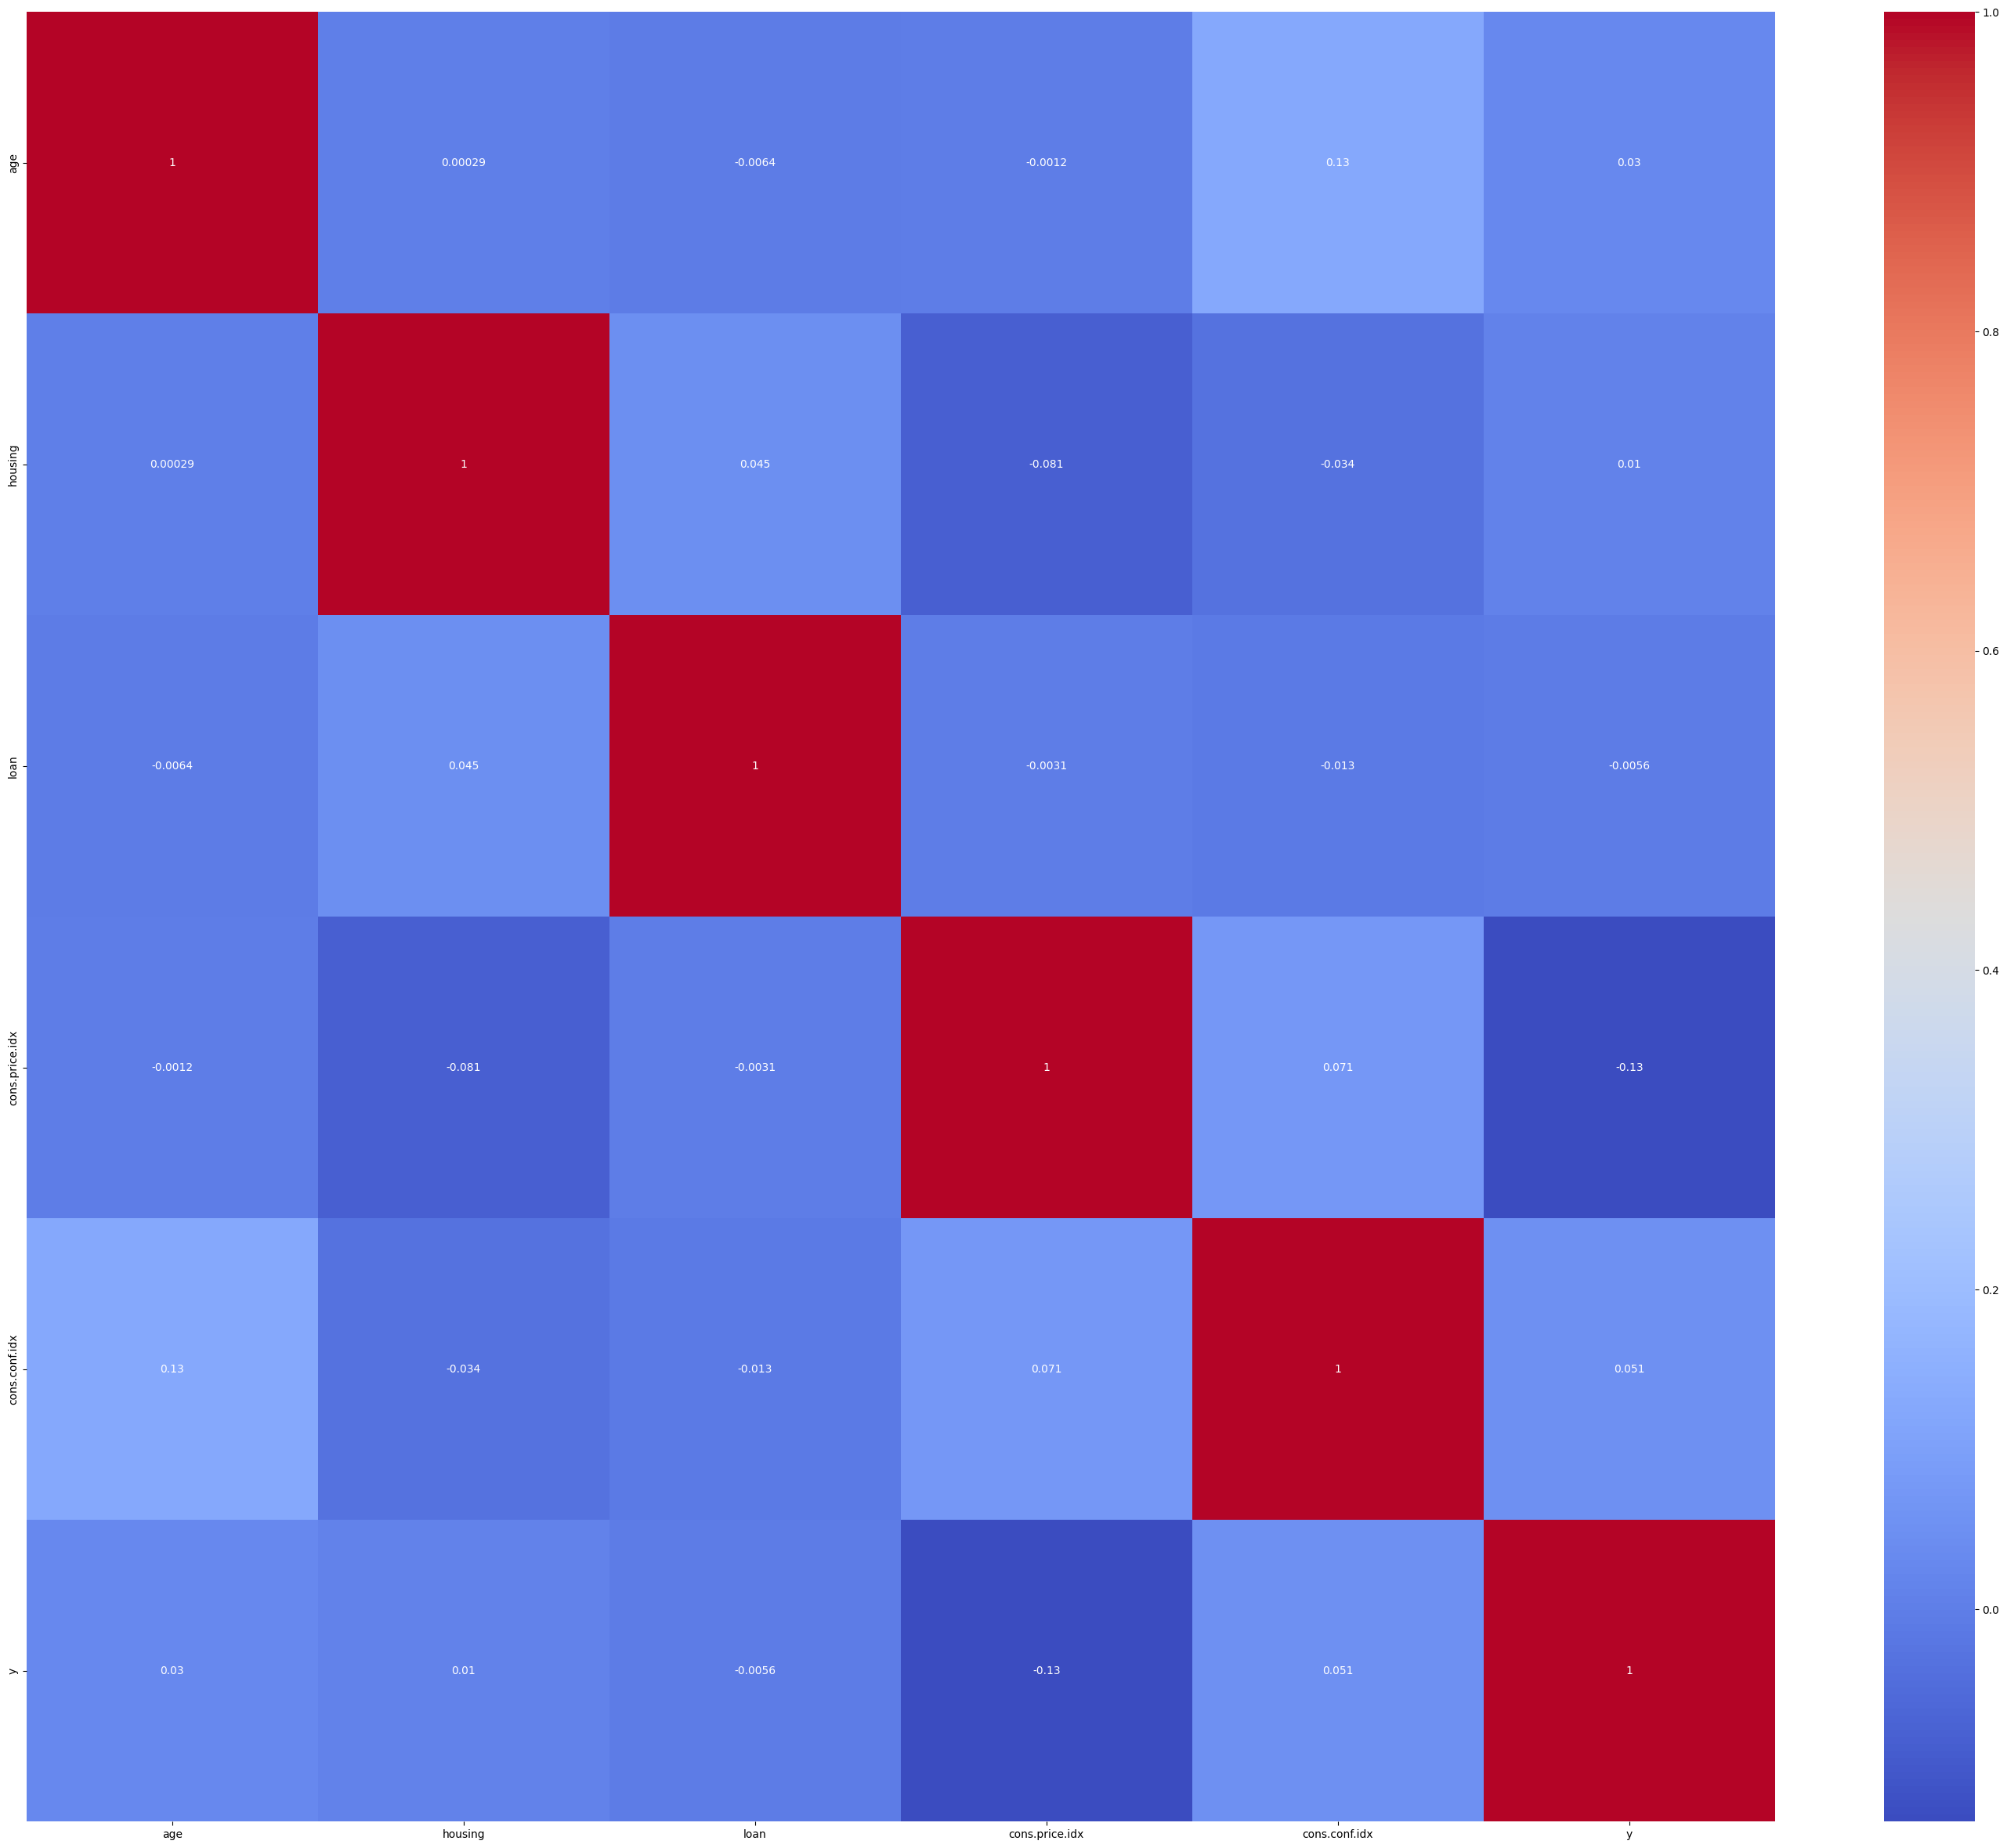

In [528]:
plt.figure(figsize=(36,30))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True,cmap='coolwarm')
plt.show()

In [529]:
print(df['y'].unique())


[0 1]


y                 1.000000
previous          0.217138
cons.conf.idx     0.051424
age               0.030130
housing           0.009996
loan             -0.005603
cons.price.idx   -0.133084
pdays            -0.319351
Name: y, dtype: float64


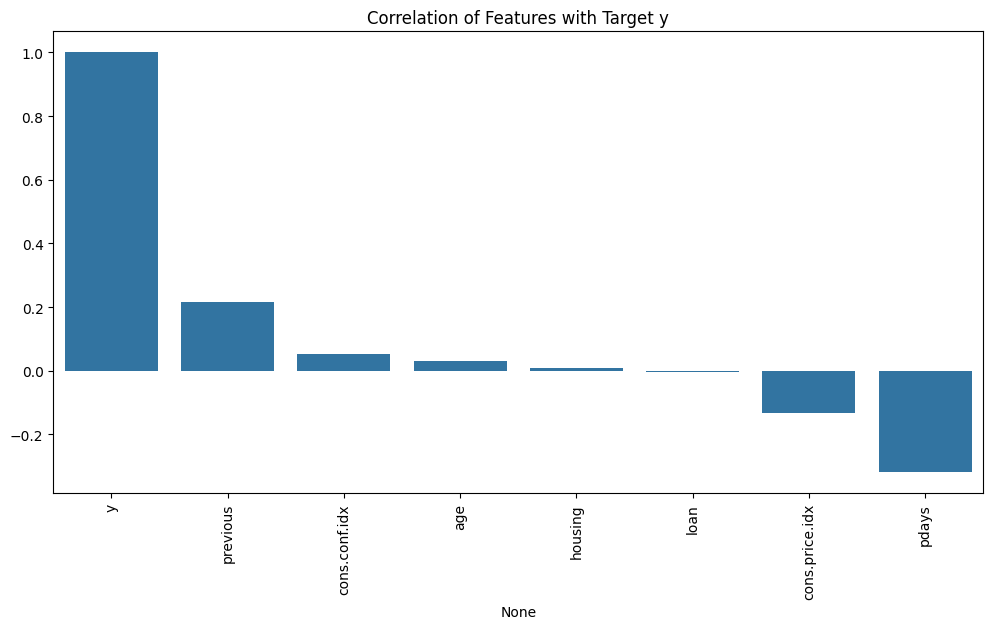

In [530]:
corr_with_y = numeric_df.corr()['y'].sort_values(ascending=False)
print(corr_with_y)

plt.figure(figsize=(12,6))
sns.barplot(x=corr_with_y.index, y=corr_with_y.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target y")
plt.show()


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   poutcome             38245 non-null  object 
 4   cons.price.idx       38245 non-null  float64
 5   cons.conf.idx        38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  bool   
 8   blue-collar          38245 non-null  bool   
 9   entrepreneur         38245 non-null  bool   
 10  housemaid            38245 non-null  bool   
 11  management           38245 non-null  bool   
 12  retired              38245 non-null  bool   
 13  self-employed        38245 non-null  bool   
 14  services             38245 non-null  bool   
 15  student              38245 non-null  bool

**Use any prediction algorithm based upon EDA**

In [532]:
from sklearn.model_selection import train_test_split

In [533]:
X = df.drop('y', axis=1)
y = df['y']

In [534]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [535]:
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True)*100)

y
0    33987
1     4258
Name: count, dtype: int64
y
0    88.866518
1    11.133482
Name: proportion, dtype: float64


**Rescaling the continuous variable**

In [536]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [537]:
scaler = MinMaxScaler()
X_train[var_numerical] = scaler.fit_transform(X_train[var_numerical])

In [538]:
X_test[var_numerical] = scaler.transform(X_test[var_numerical])

In [539]:
X.head()

,age,housing,loan,poutcome,cons.price.idx,cons.conf.idx,telephone,blue-collar,entrepreneur,housemaid,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,nonexistent,93.994,-36.4,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,57,0,0,nonexistent,93.994,-36.4,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,37,1,0,nonexistent,93.994,-36.4,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,40,0,0,nonexistent,93.994,-36.4,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,56,0,1,nonexistent,93.994,-36.4,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [540]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [541]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)


df_train shape: (30596, 39)
df_test shape: (7649, 39)


In [542]:
y_train = df_train.pop('y')
X_train = df_train
y_test = df_test.pop('y')
X_test = df_test

In [543]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30596, 38), (30596,), (7649, 38), (7649,))

In [544]:
non_numeric = X_train.select_dtypes(exclude=['int64','float64']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index(['poutcome', 'telephone', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'],
      dtype='object')


In [545]:
combined = pd.concat([X_train, X_test])
combined_encoded = pd.get_dummies(combined, drop_first=True)
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]


**Train the model to fit the data**

In [546]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn import metrics


**Draw ROC curve from the training and test data probability**

In [560]:
def draw_roc(train_actual,train_prob,test_actual,test_prob):
  train_fpr,train_fpr,train_thresholds = metrics.roc_curve(train_actual,train_prob,drop_intermediate=False)
  test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test_actual,test_prob,drop_intermediate=False)

  train_auc_score = metrics.roc_auc_score(train_actual,train_prob)
  test_auc_score = metrics.roc_auc_score(test_actual,test_prob)
  plt.figure(figsize=(10,5))
  plt.plot(train_fpr,train_fpr,label= f"Train ROC (AUC = {train_auc_score:.2f})",color='red')
  plt.plot(test_fpr,test_tpr,label= f"Test ROC (AUC = {test_auc_score:.2f})",color='green')
  plt.plot([0,1],[0,1],linestyle='--',color='black')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()
  return test_auc_score,train_auc_score

**Make predictions using the trained model**

training the model

In [548]:
def training_model_hyperparameter(model,scoring,param_grid,y_train):
  folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
  grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=folds,verbose=0,return_train_score=True,n_jobs=-1,scoring=scoring)
  grid_search.fit(X_train,y_train)
  return grid_search


In [553]:
def prediction_model(model,X_train,y_train,X_test,y_test):
  y_train_pred = model.predict(X_train)
  y_train_pred_prob = model.predict_proba(X_train)[:,1]
  y_test_pred = model.predict(X_test)
  y_test_pred_prob = model.predict_proba(X_test)[:,1]
  return y_train_pred,y_train_pred_prob,y_test_pred,y_test_pred_prob


**Creating a test case and generate a predicted result from the system**

we will use Logistic regression

In [550]:
from sklearn.linear_model import LogisticRegression

In [564]:
logreg = LogisticRegression(solver='lbfgs',random_state=100,max_iter=1000,C=0.1)
logreg.fit(X_train_encoded,y_train)
print("Traininng accuracy:", logreg.score(X_train_encoded,y_train))


Traininng accuracy: 0.8969473133742973


In [565]:
y_train_pred,y_train_prob,y_test_pred,y_test_prob = prediction_model(
    logreg,X_train_encoded,y_train,X_test_encoded,y_test)

cm = confusion_matrix(y_test,y_test_pred)
print(cm)

[[6706   86]
 [ 717  140]]


In [566]:
print("classification report: \n", classification_report(y_test,y_test_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6792
           1       0.62      0.16      0.26       857

    accuracy                           0.90      7649
   macro avg       0.76      0.58      0.60      7649
weighted avg       0.87      0.90      0.87      7649



In [567]:
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))

Accuracy Score:
 0.8950189567263694


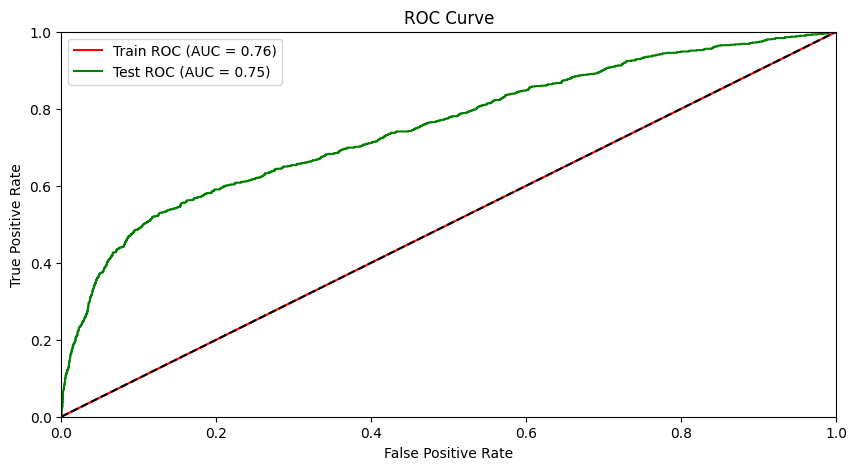

(np.float64(0.7493329031477762), np.float64(0.7600099826797857))


In [572]:
ROC_Curve = draw_roc(y_train,y_train_prob,y_test,y_test_prob)
print(ROC_Curve)